In [1]:
pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/19/62/aede3a7915ec845107a9a74f2f4a67f2b2971903e656c2ca38aa15751678/ultralytics-8.3.203-py3-none-any.whl.metadata
  Obtaining dependency information for pyyaml>=5.3.1 from https://files.pythonhosted.org/packages/0c/e8/4f648c598b17c3d06e8753d7d13d57542b30d56e6c2dedf9c331ae56312e/PyYAML-6.0.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for torch>=1.8.0 from https://files.pythonhosted.org/packages/af/8a/5c87f08e3abd825c7dfecef5a0f1d9aa5df5dd0e3fd1fa2f490a8e512402/torch-2.8.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for torchvision>=0.9.0 from https://files.pythonhosted.org/packages/82/c1/c2fe6d61e110a8d0de2f94276899a2324a8f1e6aee559eb6b4629ab27466/torchvision-0.23.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for polars from https://files.pythonhosted.org/packages/06/a6/dc535da476c93b2efac619e04ab81081e004e4b4553352


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
from ultralytics import YOLO
#import numpy as np
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Administrator\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
pip install  pytesseract

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



image 1/1 c:\Users\Administrator\Documents\GitHub\dspCPE4A2526\dspPython\23.jpg: 576x640 1 Plate-Number, 816.3ms
Speed: 3.7ms preprocess, 816.3ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 640)


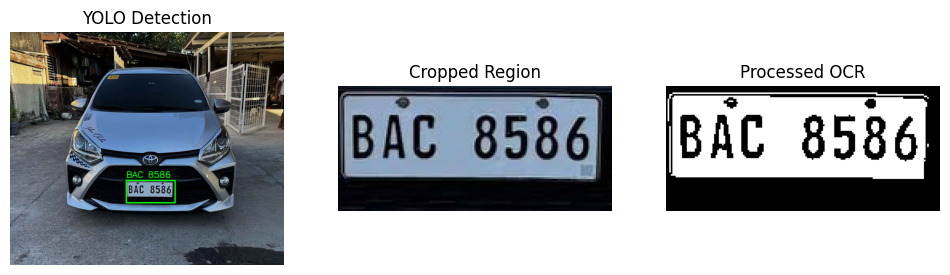

Extracted Text: BAC 8586


In [33]:
from ultralytics import YOLO
import cv2
import pytesseract
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
model = YOLO("best2.pt")
image_path = "23.jpg"

results = model(image_path, conf=0.5) 

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

detected_texts = []

for result in results:
    boxes = result.boxes 
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        roi = img[y1:y2, x1:x2] 

        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        text = pytesseract.image_to_string(thresh, config="--psm 7").strip()
        detected_texts.append(text)

        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 3)
        cv2.putText(img_rgb, text, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)

        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.imshow(img_rgb)
        plt.title("YOLO Detection")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        plt.title("Cropped Region")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(thresh, cmap="gray")
        plt.title("Processed OCR")
        plt.axis("off")

        plt.show()

        print("Extracted Text:", text)

if not detected_texts:
    print(" No plate detected.")
